<a href="https://colab.research.google.com/github/Satwikram/Deep-Learning-Notebooks/blob/master/CNN/Traffic_signals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
@Author : Satwik Ram K

"""
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"satwikram","key":"06c98063bdd0e68efaf2312bfe2c72df"}'}

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d valentynsichkar/traffic-signs-preprocessed

100% 4.15G/4.16G [00:53<00:00, 75.0MB/s]
100% 4.16G/4.16G [00:53<00:00, 83.1MB/s]


In [6]:
! unzip /content/traffic-signs-preprocessed.zip

Archive:  /content/traffic-signs-preprocessed.zip
  inflating: data0.pickle            
  inflating: data1.pickle            
  inflating: data2.pickle            
  inflating: data3.pickle            
  inflating: data4.pickle            
  inflating: data5.pickle            
  inflating: data6.pickle            
  inflating: data7.pickle            
  inflating: data8.pickle            
  inflating: datasets_preparing.py   
  inflating: label_names.csv         
  inflating: labels.pickle           
  inflating: mean_image_gray.pickle  
  inflating: mean_image_rgb.pickle   
  inflating: std_gray.pickle         
  inflating: std_rgb.pickle          
  inflating: test.pickle             
  inflating: train.pickle            
  inflating: valid.pickle            


In [21]:
#Importing Librarires
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import pickle
import matplotlib.pyplot as plt



In [22]:
#Loading data2.pickle file with RGB
with open('/content/data2.pickle', 'rb') as f:
  data = pickle.load(f, encoding = 'latin1')


In [24]:
# Preparing y_train and y_validation for using in Keras
from keras.utils.np_utils import to_categorical
data['y_train'] = to_categorical(data['y_train'], num_classes=43)
data['y_validation'] = to_categorical(data['y_validation'], num_classes=43)

In [25]:
data['y_train'][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

TypeError: ignored

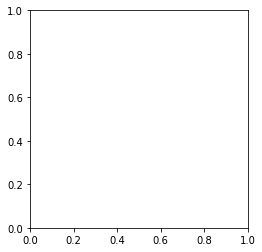

In [26]:
%matplotlib inline
plt.imshow(data['x_train'][0])
plt.show()

There is a shape miss match we need to transpose it!

In [27]:
data['x_train'] = data['x_train'].transpose(0, 2, 3, 1)
data['x_validation'] = data['x_validation'].transpose(0, 2, 3, 1)
data['x_test'] = data['x_test'].transpose(0, 2, 3, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


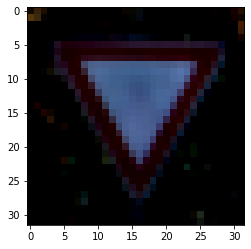

In [28]:
%matplotlib inline
plt.imshow(data['x_train'][3000])
plt.show()

In [29]:
data['x_train'].shape[1:]

(32, 32, 3)

In [37]:
#Importing tensorflow librarries
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, GlobalAveragePooling2D, BatchNormalization

In [38]:
#from tensorflow.keras.applications.inception_v3 import InceptionV3

In [39]:
# Get the InceptionV3 model so we can do transfer learning
#base_inception = InceptionV3(weights='imagenet', include_top = False, input_shape=(100, 100, 3))

In [40]:
'''
# Add a global spatial average pooling layer
out = base_inception.output
out = GlobalAveragePooling2D()(out)
out = Dense(512, activation='relu')(out)
out = Dense(512, activation='relu')(out)
predictions = Dense(43, activation='softmax')(out)
'''

In [ ]:
'''
model = Model(inputs=base_inception.input, outputs=predictions)

# only if we want to freeze layers
for layer in base_inception.layers:
    layer.trainable = False
    
# Compile 
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy']) 

model.summary()
'''

In [47]:
model = Sequential([
        
        Conv2D(16, (5,5), padding = 'same', input_shape = data['x_train'].shape[1:], activation = 'relu'),
        MaxPool2D(padding = 'same'),
        BatchNormalization(),

        Conv2D(32, (5,5), padding = 'same', activation = 'relu'),
        MaxPool2D(padding = 'same'),
        BatchNormalization(),

        Conv2D(64, (5,5), padding = 'same', activation = 'relu'),
        MaxPool2D(padding = 'same'),
        BatchNormalization(),

        Conv2D(128, (5,5), padding = 'same', activation = 'relu'),
        MaxPool2D(padding = 'same'),
        BatchNormalization(),

        Conv2D(256, (5,5), padding = 'same', activation = 'relu'),
        MaxPool2D(padding = 'same'),
        BatchNormalization(),


        Flatten(),
        Dense(512, activation = 'relu'),
        Dense(43, activation = 'softmax')
])



In [48]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [49]:
from datetime import datetime
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
checkpoint = ModelCheckpoint(filepath='model.h5', verbose=1, save_best_only=True)

In [50]:
def scheduler(epoch):
  if epoch < 10:
    return 0.001
  else:
    return 0.001 * tf.math.exp(0.1 * (10 - epoch))

In [51]:
lr_scheduler = LearningRateScheduler(scheduler)

In [52]:
callback = [checkpoint, lr_scheduler]

In [53]:
model.fit(data['x_train'], data['y_train'], validation_data = (data['x_validation'], data['y_validation']), callbacks = [callback], verbose = 1, epochs = 5)

Epoch 1/5
2719/2719 [==============================] - ETA: 0s - loss: 0.4611 - accuracy: 0.8621
Epoch 00001: val_loss improved from inf to 0.53917, saving model to model.h5
2719/2719 [==============================] - 399s 147ms/step - loss: 0.4611 - accuracy: 0.8621 - val_loss: 0.5392 - val_accuracy: 0.8741 - lr: 0.0010
Epoch 2/5
2719/2719 [==============================] - ETA: 0s - loss: 0.1106 - accuracy: 0.9667
Epoch 00002: val_loss improved from 0.53917 to 0.53304, saving model to model.h5
2719/2719 [==============================] - 398s 146ms/step - loss: 0.1106 - accuracy: 0.9667 - val_loss: 0.5330 - val_accuracy: 0.8916 - lr: 0.0010
Epoch 3/5
2719/2719 [==============================] - ETA: 0s - loss: 0.0765 - accuracy: 0.9770
Epoch 00003: val_loss improved from 0.53304 to 0.47828, saving model to model.h5
2719/2719 [==============================] - 404s 149ms/step - loss: 0.0765 - accuracy: 0.9770 - val_loss: 0.4783 - val_accuracy: 0.9163 - lr: 0.0010
Epoch 4/5
2719/2719 

In [54]:
data['y_test'][0]

25

In [55]:
from tensorflow.keras.models import load_model

In [56]:
my_model = load_model('/content/model.h5')

In [57]:
y_pred = my_model.predict(data['x_test'])

In [58]:
y_pred

array([[1.0576661e-15, 3.4071511e-14, 6.9994487e-15, ..., 8.9428614e-14,
        4.1641567e-15, 2.4837918e-15],
       [4.1884090e-05, 1.9015180e-04, 1.4476971e-04, ..., 2.2163329e-05,
        9.7549525e-07, 2.8379465e-04],
       [4.0752932e-13, 7.8378525e-13, 5.7461170e-14, ..., 1.8583699e-11,
        2.0261972e-09, 1.3891838e-15],
       ...,
       [2.3400377e-12, 2.0754653e-08, 3.1885877e-10, ..., 9.7935948e-10,
        6.9253991e-10, 2.6746010e-11],
       [8.5880605e-20, 2.0389038e-18, 1.3433013e-18, ..., 3.4406771e-15,
        1.1199760e-09, 3.3310772e-17],
       [5.0743829e-11, 3.9015324e-13, 9.5461196e-14, ..., 1.0147972e-11,
        2.9907880e-12, 1.2799356e-10]], dtype=float32)

In [59]:
y_pred = np.argmax(y_pred, axis = 1)

In [60]:
y_pred

array([25, 11, 38, ...,  8, 33, 10])

In [61]:
y_pred1 = to_categorical(y_pred, num_classes=43)

In [62]:
y_pred1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [64]:
cm = confusion_matrix(data['y_test'], y_pred)

In [65]:
cm

array([[ 44,   0,   0, ...,   0,   0,   0],
       [ 10, 661,  27, ...,   0,   0,   0],
       [  3,  22, 697, ...,   1,   0,   0],
       ...,
       [  0,   0,   0, ...,  88,   0,   0],
       [  0,   0,   0, ...,   0,  53,   3],
       [  0,   0,   0, ...,   0,   7,  80]])

In [66]:
score = accuracy_score(data['y_test'], y_pred)

In [67]:
score*100

90.2929532858274